In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits import mplot3d
import sklearn.cluster as skc
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.svm import LinearSVC
from sklearn import tree 
from sklearn.model_selection import GridSearchCV

In [2]:
path = r'C:\\Users\\Codex\\Desktop\\IPS\\组会\\UJIndoorLoc\\trainingData_B0.csv'

In [3]:
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
train_df = pd.read_csv(path, header=0)
train_df = train_df[:]


In [4]:
train_df.iloc[5,520:522]

LONGITUDE   -7.605419e+03
LATITUDE     4.864979e+06
Name: 5, dtype: float64

In [5]:
train_df_features = np.asarray(train_df.iloc[:,0:520])

In [6]:
train_df_features

array([[100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       ...,
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100]], dtype=int64)

In [7]:
train_df_label = np.asarray(train_df.iloc[:,522:523])

In [8]:
train_df_label

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [9]:
path = r'C:\\Users\\Codex\\Desktop\\IPS\\组会\\UJIndoorLoc\\validationData_B0.csv'
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
valid_df = pd.read_csv(path, header=0)
valid_df = valid_df[:]


In [10]:
valid_df_features = np.asarray(valid_df.iloc[:,0:520])

In [11]:
valid_df_label = np.asarray(valid_df.iloc[:,522:523])

In [12]:
valid_df_label

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [13]:
X_train,X_test,y_train,y_test=train_df_features,valid_df_features,train_df_label,valid_df_label

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5248, 520) (458, 520) (5248, 1) (458, 1)


In [15]:
model = LinearSVC(C=44)
model.fit(X_train,y_train)
pred = model.predict(X_test)
SVM_score =model.score(X_test,y_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
SVM_score

0.4104803493449782

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\l

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\l

0.5
30


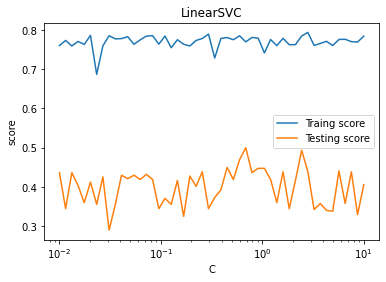

In [17]:
def test_LinearSVC_C(*data):
    '''
    测试 LinearSVC 的预测性能随参数 C 的影响
    '''
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for C in Cs:
        cls=svm.LinearSVC(C=C)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))

    ## 绘图
    
    print(max(test_scores))
    print(test_scores.index(max(test_scores)))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Traing score")
    ax.plot(Cs,test_scores,label="Testing score")
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LinearSVC")
    ax.legend(loc='best')
    plt.show()
    
# 调用 test_LinearSVC_C
test_LinearSVC_C(X_train,X_test,y_train,y_test)

In [25]:
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train,y_train)
KNN_score = KNN.score(X_test,y_test)
scores = cross_val_score(KNN, X_train, y_train, cv=5, scoring='accuracy')

D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

In [26]:
KNN_score 

0.4192139737991266

In [27]:
print(scores)
print(scores.mean())

[0.74571429 0.73809524 0.76190476 0.76453765 0.76835081]
0.7557205501838485


In [20]:
clf = tree.DecisionTreeClassifier(max_depth=7,criterion = 'entropy',random_state=30,splitter="random")
clf = clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
result = clf.predict(X_train)

In [21]:
score

0.5480349344978166

In [22]:
#把预测正确的坐标存到一个数组里面
correct = pd.DataFrame()
s = []
res = 0
for i in range(len(train_df_label)):
    if result[i] == train_df_label[i]:
        #如何转换成pd格式？
        s.append(train_df.iloc[i,520:522])
        res+=1
print(s)

[LONGITUDE      -7637.257
LATITUDE     4864949.814
Name: 0, dtype: float64, LONGITUDE   -7.628135e+03
LATITUDE     4.864977e+06
Name: 1, dtype: float64, LONGITUDE   -7.622055e+03
LATITUDE     4.864976e+06
Name: 2, dtype: float64, LONGITUDE   -7.636206e+03
LATITUDE     4.864967e+06
Name: 3, dtype: float64, LONGITUDE   -7.633730e+03
LATITUDE     4.864965e+06
Name: 4, dtype: float64, LONGITUDE   -7.605419e+03
LATITUDE     4.864979e+06
Name: 5, dtype: float64, LONGITUDE   -7.607248e+03
LATITUDE     4.864979e+06
Name: 6, dtype: float64, LONGITUDE      -7616.556
LATITUDE     4864975.879
Name: 7, dtype: float64, LONGITUDE   -7.618587e+03
LATITUDE     4.864975e+06
Name: 8, dtype: float64, LONGITUDE   -7.592733e+03
LATITUDE     4.864983e+06
Name: 9, dtype: float64, LONGITUDE   -7.611056e+03
LATITUDE     4.864982e+06
Name: 10, dtype: float64, LONGITUDE   -7.592719e+03
LATITUDE     4.864984e+06
Name: 11, dtype: float64, LONGITUDE   -7.587041e+03
LATITUDE     4.864986e+06
Name: 12, dtype: float64,

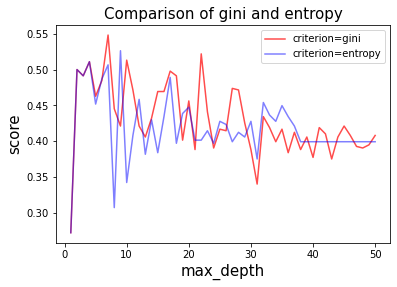

In [23]:
test = []
gini = []
for i in range(50):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )

    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test.append(score)
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="gini"
                                    ,random_state=30
                                    ,splitter="random"
                                    )

    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    gini.append(score)
    
    
plt.plot(range(1,51),test,color="red",label="criterion=gini",alpha=0.7)
plt.plot(range(1,51),gini,color="blue",label="criterion=entropy",alpha=0.5)
plt.xlabel('max_depth',fontsize = 15)
plt.ylabel('score',fontsize = 15)
plt.title('Comparison of gini and entropy',fontsize = 15)
plt.legend()
plt.show()
